## Problem statement 

Context:
A new football club named ‘GL United FC’ has just been inaugurated. This club
does not have a team yet. The team is looking to hire players for their roster.
Management wants to make such decisions using a data based approach.
During a recent hiring drive, you were selected for the Data Science team as a
data scientist. Your team has been tasked with creating a report which
recommends players for the main team. To start with, a total of 15 players are
required. Player data for all teams has been acquired from FIFA. This data
contains information about the players, the clubs they are currently playing for
and various performance measures. The team needs 20 possible players to
choose from. You have been requested to do the analysis and formulate a
report in order to help the management make a decision regarding potential
players.


## Understanding the data first 

In [340]:
#Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [341]:
# read the dataset

df = pd.read_csv('fifa.csv', index_col=False)
df.head(5)

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [342]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 60 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        18207 non-null  int64  
 1   Name                      18207 non-null  object 
 2   Age                       18207 non-null  int64  
 3   Photo                     18207 non-null  object 
 4   Nationality               18207 non-null  object 
 5   Flag                      18207 non-null  object 
 6   Overall                   18207 non-null  int64  
 7   Potential                 18207 non-null  int64  
 8   Club                      17966 non-null  object 
 9   Club Logo                 18207 non-null  object 
 10  Value                     18207 non-null  object 
 11  Wage                      18207 non-null  object 
 12  Preferred Foot            18159 non-null  object 
 13  International Reputation  18159 non-null  float64
 14  Weak F

In [343]:
df.shape

(18207, 60)

In [344]:
# Lets check the statistical summary of the data
df.describe()

,ID,Age,Overall,Potential,International Reputation,Weak Foot,Skill Moves,Jersey Number,Crossing,Finishing,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,18207.000000,18207.000000,18207.000000,18207.000000,18159.000000,18159.000000,18159.000000,18147.000000,18159.000000,18159.000000,...,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000
mean,214298.338606,25.122206,66.238699,71.307299,1.113222,2.947299,2.361308,19.546096,49.734181,45.550911,...,48.548598,58.648274,47.281623,47.697836,45.661435,16.616223,16.391596,16.232061,16.388898,16.710887
std,29965.244204,4.669943,6.908930,6.136496,0.394031,0.660456,0.756164,15.947765,18.364524,19.525820,...,15.704053,11.436133,19.904397,21.664004,21.289135,17.695349,16.906900,16.502864,17.034669,17.955119
min,16.000000,16.000000,46.000000,48.000000,1.000000,1.000000,1.000000,1.000000,5.000000,2.000000,...,5.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,200315.500000,21.000000,62.000000,67.000000,1.000000,3.000000,2.000000,8.000000,38.000000,30.000000,...,39.000000,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,221759.000000,25.000000,66.000000,71.000000,1.000000,3.000000,2.000000,17.000000,54.000000,49.000000,...,49.000000,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,236529.500000,28.000000,71.000000,75.000000,1.000000,3.000000,3.000000,26.000000,64.000000,62.000000,...,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,246620.000000,45.000000,94.000000,95.000000,5.000000,5.000000,5.000000,99.000000,93.000000,95.000000,...,92.000000,96.000000,94.000000,93.000000,91.000000,90.000000,92.000000,91.000000,90.000000,94.000000


## Data Cleaning and Preprocessing

Drop the below columns which you think redundant for the analysis

    Photo, Flag, Club logo, Jersey Number

In [345]:
# Drop the columns redundant for the analysis
df.drop(columns= ['Photo','Flag','Club Logo','Jersey Number'],inplace=True)
df.head(5)

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,Left,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,Right,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,Right,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,Spain,91,93,Manchester United,€72M,€260K,Right,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,€355K,Right,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [346]:
# Check if there are any duplicate records in the dataset? If any, drop them.
def ifDuplicateSamples(data):
  dd = data.duplicated().sum()
  if dd == 0:
    print("There are no duplicate rows")
    return
  else:
    print("There are ",dd,"duplicate rows")

#running it on current data
ifDuplicateSamples(df)

There are no duplicate rows


### Check for the percentage of missing values and impute them with appropriate imputation techniques.

In [347]:
nulls = df.isnull().sum()
nulls.sort_values(ascending=False)

Loaned From                 16943
Release Clause               1564
Joined                       1553
Contract Valid Until          289
Club                          241
Position                       60
GKHandling                     48
GKDiving                       48
Agility                        48
Reactions                      48
Balance                        48
ShotPower                      48
Jumping                        48
Stamina                        48
Strength                       48
LongShots                      48
Aggression                     48
Interceptions                  48
GKReflexes                     48
GKPositioning                  48
GKKicking                      48
Acceleration                   48
Positioning                    48
Vision                         48
Penalties                      48
Composure                      48
Marking                        48
StandingTackle                 48
SlidingTackle                  48
SprintSpeed   

In [348]:
# Drop the column "Loaned From" redundant for the analysis
df.drop(columns= ['Loaned From'],inplace=True)
df.head(5)

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,Left,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,Right,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,Right,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,Spain,91,93,Manchester United,€72M,€260K,Right,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,€355K,Right,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


### Convert the columns "Value", "Wage", "Release Clause" to float datatype
after getting rid of currency symbol and suffix. (6 points)
- Note: When the record/entry has "M"(indicates millions) as suffix you
need to multiply that value with 1000000
- When the record/entry has "K"(indicates thousands) as suffix you
need to multiply that value with 1000

In [349]:
def clean_release(x):
    x = str(x)
    if '€' in x:
        x = x.replace('€','')
    if "M" in x:
        m = 10 ** 6
        x = x.replace('M','')
        x = str(float(x) * m)
    if "K" in x:
        k = 10 ** 3
        x = x.replace('K','')
        x = str(float(x)*k)
    return x
    
# print(df_drop1['Release Clause'].tail(20))
df['Release Clause'] = df['Release Clause'].apply(clean_release)
df['Value'] = df['Value'].apply(clean_release)
df['Wage'] = df['Wage'].apply(clean_release)
df.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500000.0,565000.0,Left,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226500000.0
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000.0,405000.0,Right,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127100000.0
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500000.0,290000.0,Right,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228100000.0
3,193080,De Gea,27,Spain,91,93,Manchester United,72000000.0,260000.0,Right,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138600000.0
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102000000.0,355000.0,Right,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196400000.0


### Convert the column "Joined" into integer data type with keeping only the year

In [350]:
df['Joined'].head()

0     Jul 1, 2004
1    Jul 10, 2018
2     Aug 3, 2017
3     Jul 1, 2011
4    Aug 30, 2015
Name: Joined, dtype: object

In [351]:
df.dropna(subset=['Joined'],inplace=True)

In [352]:
df['Joined'] = df['Joined'].apply(lambda x: str(x)[-4:])
df['Joined'].head()

0    2004
1    2018
2    2017
3    2011
4    2015
Name: Joined, dtype: object

### Convert the column "Contract Valid Until" to pandas datetime type

In [353]:
df['Contract Valid Until'].head()

0    2021
1    2022
2    2022
3    2020
4    2023
Name: Contract Valid Until, dtype: object

In [354]:
import datetime as dt

df['Contract Valid Until'] = df['Contract Valid Until'].apply(lambda x: dt.datetime.strptime(x,'%Y')).dt.year
df['Contract Valid Until'].head()

0    2021
1    2022
2    2022
3    2020
4    2023
Name: Contract Valid Until, dtype: int64

### The column 'Height' is in inches with a quotation mark, Convert to float with decimal point

In [355]:
df['Height'].head() 

0     5'7
1     6'2
2     5'9
3     6'4
4    5'11
Name: Height, dtype: object

In [356]:
from functools import reduce
from operator import add

"""
input should be in ft'inch format
"""
def convert_to_ft(inp):
    ft = list(map(int,inp.split("'")))
    ft[1] /= 12
    
    return reduce(add,ft)

In [357]:
df['Height'] = df['Height'].map(lambda x : round(convert_to_ft(x),2))
df['Height'].head()

0    5.58
1    6.17
2    5.75
3    6.33
4    5.92
Name: Height, dtype: float64

### The column "Weight" has the suffix as lbs, remove the suffix and convert to float

In [358]:
df['Weight'].head()

0    159lbs
1    183lbs
2    150lbs
3    168lbs
4    154lbs
Name: Weight, dtype: object

In [359]:
# checking the last three letters are 'lbs' everywhere
pd.unique(df['Weight'].map(lambda x: x[-3:]))

array(['lbs'], dtype=object)

In [360]:
df['Weight'] = df['Weight'].map(lambda x: x[:-3])
df['Weight'].head()

0    159
1    183
2    150
3    168
4    154
Name: Weight, dtype: object

## Exploratory Data Analysis

### Plot the distribution of Overall rating for all the players and write your findings

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


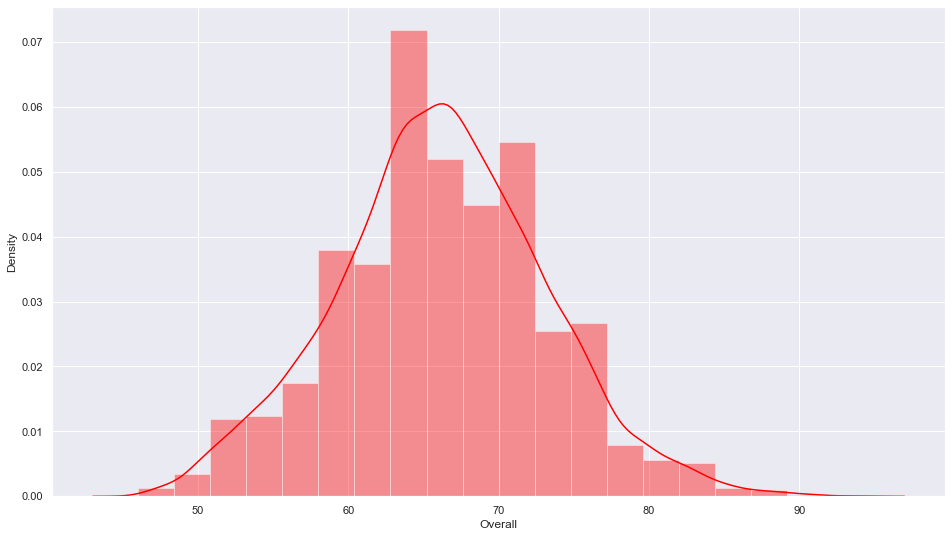

In [361]:
sns.distplot(a=df['Overall'],bins=20,kde=True,color="red")
plt.show()

### Retrieve the names of top20 players based on the Overall rating

In [362]:
df_top_20 = df.query('`Contract Valid Until` == 2020').sort_values(by='Overall',ascending=False).head(20)
df_top_20['Name']

3               De Gea
6            L. Modrić
8         Sergio Ramos
5            E. Hazard
13         David Silva
21           E. Cavani
24        G. Chiellini
31          C. Eriksen
39        Thiago Silva
50          D. Mertens
52           M. Hamšík
49          Jordi Alba
46            K. Navas
64         Alex Sandro
71     T. Alderweireld
73          M. Benatia
75         Fernandinho
102              Naldo
104            Miranda
103         B. Matuidi
Name: Name, dtype: object

#### Generate a dataframe which should include all the information of the Top 20 players based on the Overall rating

In [363]:
df_top_20 

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
3,193080,De Gea,27,Spain,91,93,Manchester United,72000000.0,260000.0,Right,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138600000.0
6,177003,L. Modrić,32,Croatia,91,91,Real Madrid,67000000.0,420000.0,Right,...,84.0,60.0,76.0,73.0,13.0,9.0,7.0,14.0,9.0,137400000.0
8,155862,Sergio Ramos,32,Spain,91,91,Real Madrid,51000000.0,380000.0,Right,...,82.0,87.0,92.0,91.0,11.0,8.0,9.0,7.0,11.0,104600000.0
5,183277,E. Hazard,27,Belgium,91,91,Chelsea,93000000.0,340000.0,Right,...,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0,172100000.0
13,168542,David Silva,32,Spain,90,90,Manchester City,60000000.0,285000.0,Left,...,93.0,59.0,53.0,29.0,6.0,15.0,7.0,6.0,12.0,111000000.0
21,179813,E. Cavani,31,Uruguay,89,89,Paris Saint-Germain,60000000.0,200000.0,Right,...,82.0,52.0,45.0,39.0,12.0,5.0,13.0,13.0,10.0,111000000.0
24,138956,G. Chiellini,33,Italy,89,89,Juventus,27000000.0,215000.0,Left,...,84.0,93.0,93.0,90.0,3.0,3.0,2.0,4.0,3.0,44600000.0
31,190460,C. Eriksen,26,Denmark,88,91,Tottenham Hotspur,73500000.0,205000.0,Right,...,88.0,59.0,57.0,22.0,9.0,14.0,7.0,7.0,6.0,141500000.0
39,164240,Thiago Silva,33,Brazil,88,88,Paris Saint-Germain,24000000.0,165000.0,Right,...,81.0,88.0,89.0,85.0,9.0,12.0,5.0,9.0,10.0,44400000.0
50,175943,D. Mertens,31,Belgium,87,87,Napoli,45000000.0,135000.0,Right,...,81.0,25.0,40.0,40.0,7.0,10.0,8.0,10.0,4.0,76500000.0


### What is the average "Age" and "Wage" of these top 20 players?

In [364]:
# Average Wage of top 20 players
df_top_20['Wage'] = df_top_20['Wage'].astype('float')
df_top_20['Wage'].mean()

205450.0

In [365]:
# Average age of top 20 players
df_top_20['Age'].mean()

30.65

#### Among the top 20 players based on the Overall rating, which player has the highest wage? Display the name of the player with his wage.

In [366]:
df_top_20['Wage'].max()

420000.0

In [367]:
df_top_20.loc[df_top_20['Wage'] == 420000.0, 'Name']

6    L. Modrić
Name: Name, dtype: object

### Generate a dataframe which should include the "Player name", "Club Name", "Wage", and 'Overall rating'

In [368]:
df.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500000.0,565000.0,Left,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226500000.0
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000.0,405000.0,Right,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127100000.0
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500000.0,290000.0,Right,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228100000.0
3,193080,De Gea,27,Spain,91,93,Manchester United,72000000.0,260000.0,Right,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138600000.0
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102000000.0,355000.0,Right,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196400000.0


In [369]:
df_new = df[['Name', 'Club', 'Wage','Overall']]
df_new.head()

,Name,Club,Wage,Overall
0,L. Messi,FC Barcelona,565000.0,94
1,Cristiano Ronaldo,Juventus,405000.0,94
2,Neymar Jr,Paris Saint-Germain,290000.0,92
3,De Gea,Manchester United,260000.0,91
4,K. De Bruyne,Manchester City,355000.0,91


i) find the average Overall rating for each club.

In [370]:
df_club = df.groupby(['Club'])['Overall'].mean()
df_club.head()

Club
 SSV Jahn Regensburg     65.760000
1. FC Heidenheim 1846    65.750000
1. FC Kaiserslautern     63.384615
1. FC Köln               70.785714
1. FC Magdeburg          65.791667
Name: Overall, dtype: float64

ii) Display the average overall rating of Top10 Clubs using a plot

In [371]:
df_club.sort_values(ascending=False).head(10)

Club
Juventus               82.280000
Napoli                 80.041667
Inter                  79.619048
Real Madrid            78.242424
FC Barcelona           78.030303
Milan                  77.541667
Paris Saint-Germain    77.433333
Roma                   77.400000
Manchester United      77.242424
SL Benfica             77.074074
Name: Overall, dtype: float64

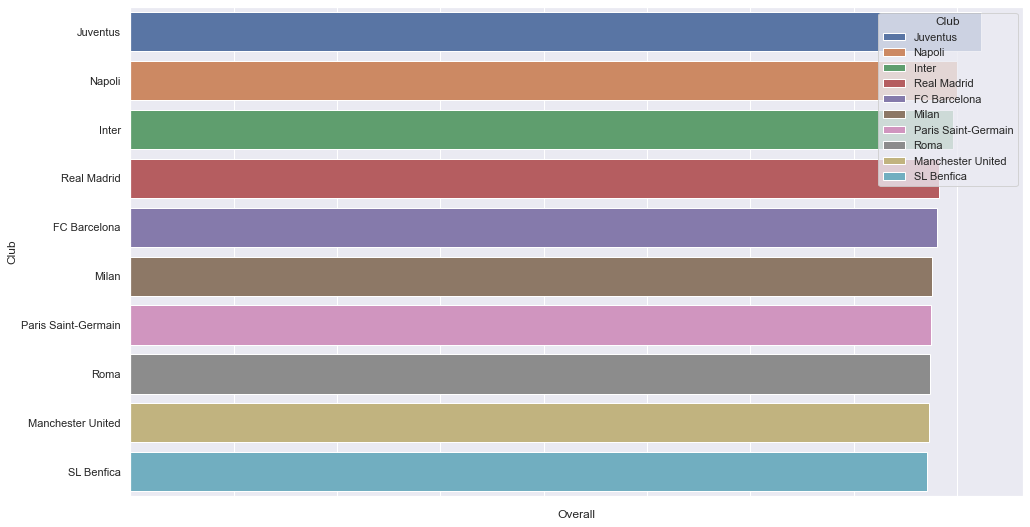

In [372]:
sns.set(rc={'figure.figsize':(16,9)})

dc= df.groupby('Club', as_index=False)['Overall'].mean().sort_values(by='Overall', ascending=False).head(10)
sns.barplot(data=dc, x='Overall', y='Club', hue='Club', dodge=False).set(xticklabels=[]);

### What is the relationship between age and individual potential of the player? Visualize the relationship with appropriate plot and Comment on the same.

In [373]:
correlation = df['Age'].corr( df['Potential'])
correlation

-0.239021909004125

In [374]:
dpa=df[['Age', 'Potential']]
dpa.head()

,Age,Potential
0,31,94
1,33,94
2,26,93
3,27,93
4,27,92


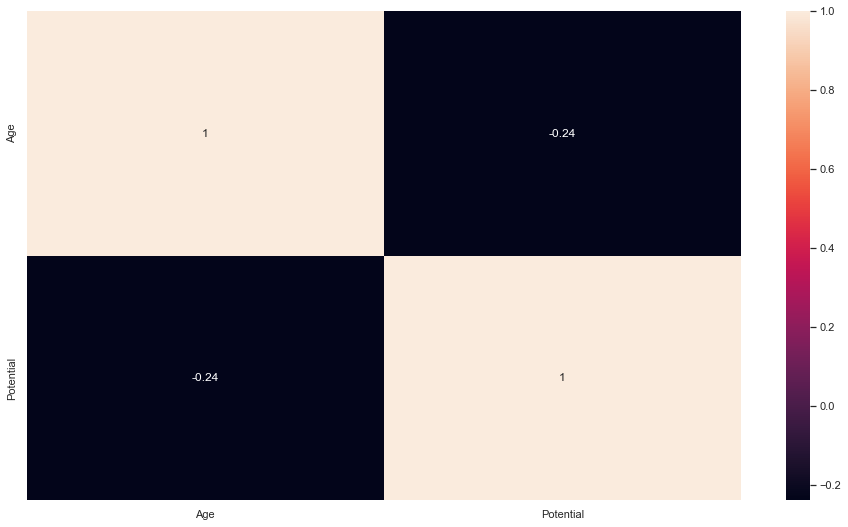

In [375]:
import seaborn as sns
 
#plotting the heatmap for correlation
ax = sns.heatmap(dpa.corr(), annot=True)

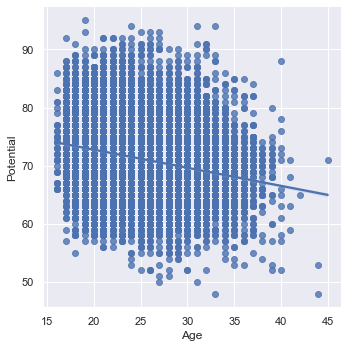

In [376]:
sns.lmplot(x="Age", y="Potential", data=dpa);

Relationship between age and individual potential of the player are inversely correlated. With increase in Age of player the Potential of the player decreases.

### Which features directly contribute to the wages of the players?
Support your answer with a plot and a metric. 
(hint: use potential, Overall, value, international reputation, and Release Clause)

In [377]:
dw=df[['Potential', 'Overall', 'International Reputation', 'Release Clause', 'Wage']]
dw.head()

,Potential,Overall,International Reputation,Release Clause,Wage
0,94,94,5.0,226500000.0,565000.0
1,94,94,5.0,127100000.0,405000.0
2,93,92,5.0,228100000.0,290000.0
3,93,91,4.0,138600000.0,260000.0
4,92,91,4.0,196400000.0,355000.0


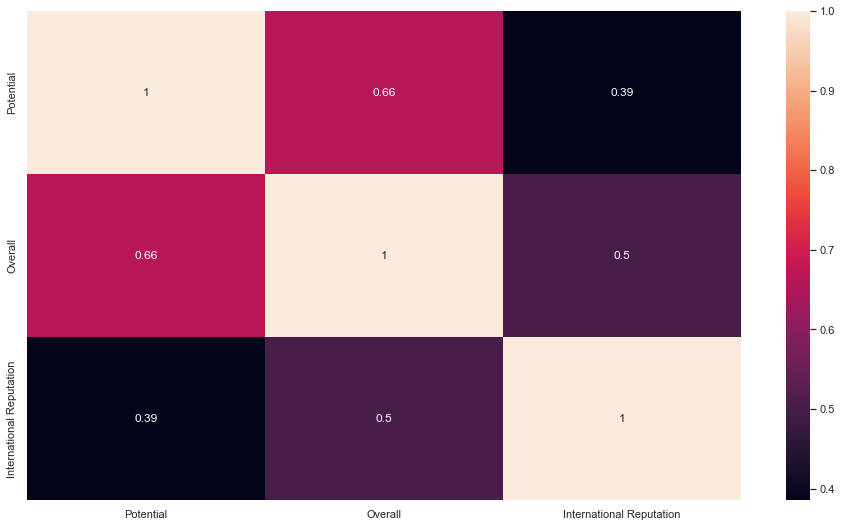

In [378]:
 #plotting the heatmap for correlation
ax = sns.heatmap(dw.corr(), annot=True)

features directly contribute to the wages of the players are potential, Overall value, international reputation

### Find the position in the pitch where the maximum number of players
play and the position where the minimum number of players play? Display
it using a plot.

In [384]:
dpp = df.groupby(by='Position')[['Position','Name']]
dpp.head()

,Position,Name
0,RF,L. Messi
1,ST,Cristiano Ronaldo
2,LW,Neymar Jr
3,GK,De Gea
4,RCM,K. De Bruyne
...,...,...
2242,RAM,Jacson Zonta
2247,LAM,Leo Caldeirinha
2322,RAM,Sebas Couteira
2342,LAM,Nicolás Formido


In [385]:
dpp =df.groupby(['Position'])['Name'].size().reset_index(name='PlayerCountbyPosition')
print(dpp)

   Position  PlayerCountbyPosition
0       CAM                    879
1        CB                   1649
2       CDM                    873
3        CF                     66
4        CM                   1276
5        GK                   1903
6       LAM                     20
7        LB                   1224
8       LCB                    597
9       LCM                    353
10      LDM                    224
11       LF                     15
12       LM                   1012
13       LS                    184
14       LW                    338
15      LWB                     76
16      RAM                     21
17       RB                   1199
18      RCB                    615
19      RCM                    355
20      RDM                    228
21       RF                     13
22       RM                   1022
23       RS                    179
24       RW                    325
25      RWB                     84
26       ST                   1924


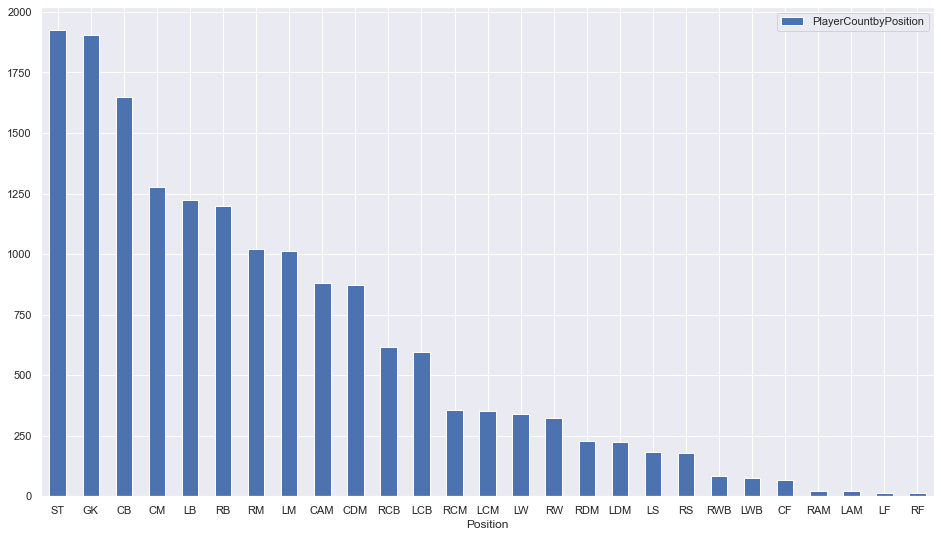

In [387]:
dpc = dpp.sort_values(by='PlayerCountbyPosition', ascending=False)
ax = dpc.plot.bar(x='Position', y='PlayerCountbyPosition', rot=0)

"RF" is the position with the minimum number of players play.

### How many players are from the club 'Juventus' and the wage is greater than 200K? Display all the information of such players

In [330]:
dc = df.loc[(df['Club'] == 'Juventus') & (df['Wage'] > 200000.0), ['Name']]
dc

,Name
1,Cristiano Ronaldo
15,P. Dybala
24,G. Chiellini


In [331]:
dc['Name'].count()

3

In [332]:
dn = df.loc[df['Name'].isin(['G. Chiellini', 'P. Dybala', 'Cristiano Ronaldo'])]
dn

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000.0,405000.0,Right,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127100000.0
15,211110,P. Dybala,24,Argentina,89,94,Juventus,89000000.0,205000.0,Left,...,84.0,23.0,20.0,20.0,5.0,4.0,4.0,5.0,8.0,153500000.0
24,138956,G. Chiellini,33,Italy,89,89,Juventus,27000000.0,215000.0,Left,...,84.0,93.0,93.0,90.0,3.0,3.0,2.0,4.0,3.0,44600000.0


### Generate a data frame containing top 5 players by Overall rating for each unique position

In [338]:
top_5 = df.groupby(by='Position')['Position','Overall'].head(5)
top_5.sort_values(['Position','Overall'],ascending=[True,False])

C:\Users\Administrator\AppData\Local\Temp\1\ipykernel_6988\1322089381.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  top_5 = df.groupby(by='Position')['Position','Overall'].head(5)


,Position,Overall
17,CAM,89
31,CAM,88
61,CAM,86
66,CAM,86
74,CAM,86
...,...,...
1,ST,94
10,ST,90
16,ST,89
23,ST,89


### What is the average wage one can expect to pay for the top 5 in every position?

In [333]:
df['Wage'] = df['Wage'].astype('float')
top_5 = df.sort_values(by='Overall')
top_5

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
18206,246269,G. Nugent,16,England,46,66,Tranmere Rovers,60000.0,1000.0,Right,...,43.0,40.0,43.0,50.0,10.0,15.0,9.0,12.0,9.0,165000.0
18186,240917,Zhang Yufeng,20,China PR,47,64,Beijing Renhe FC,60000.0,1000.0,Right,...,39.0,53.0,41.0,51.0,15.0,7.0,14.0,6.0,8.0,167000.0
18187,240158,C. Ehlich,19,Germany,47,59,SpVgg Unterhaching,40000.0,1000.0,Right,...,47.0,40.0,42.0,42.0,13.0,12.0,11.0,15.0,12.0,66000.0
18188,240927,L. Collins,17,Wales,47,62,Newport County,60000.0,1000.0,Right,...,46.0,33.0,38.0,41.0,5.0,12.0,8.0,13.0,10.0,143000.0
18189,240160,A. Kaltner,18,Germany,47,61,SpVgg Unterhaching,60000.0,1000.0,Right,...,37.0,28.0,15.0,22.0,15.0,5.0,14.0,12.0,8.0,125000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102000000.0,355000.0,Right,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196400000.0
3,193080,De Gea,27,Spain,91,93,Manchester United,72000000.0,260000.0,Right,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138600000.0
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500000.0,290000.0,Right,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228100000.0
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000.0,405000.0,Right,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127100000.0


In [334]:
top_5 =top_5.groupby('Position').head(5)
top_5

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
18206,246269,G. Nugent,16,England,46,66,Tranmere Rovers,60000.0,1000.0,Right,...,43.0,40.0,43.0,50.0,10.0,15.0,9.0,12.0,9.0,165000.0
18186,240917,Zhang Yufeng,20,China PR,47,64,Beijing Renhe FC,60000.0,1000.0,Right,...,39.0,53.0,41.0,51.0,15.0,7.0,14.0,6.0,8.0,167000.0
18187,240158,C. Ehlich,19,Germany,47,59,SpVgg Unterhaching,40000.0,1000.0,Right,...,47.0,40.0,42.0,42.0,13.0,12.0,11.0,15.0,12.0,66000.0
18188,240927,L. Collins,17,Wales,47,62,Newport County,60000.0,1000.0,Right,...,46.0,33.0,38.0,41.0,5.0,12.0,8.0,13.0,10.0,143000.0
18189,240160,A. Kaltner,18,Germany,47,61,SpVgg Unterhaching,60000.0,1000.0,Right,...,37.0,28.0,15.0,22.0,15.0,5.0,14.0,12.0,8.0,125000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6108,224385,H. Yamada,29,Japan,69,69,Júbilo Iwata,1000000.0,4000.0,Right,...,64.0,51.0,48.0,46.0,9.0,15.0,9.0,7.0,16.0,1300000.0
5785,221480,Y. Cabrera,27,Colombia,69,69,América de Cali,1100000.0,1000.0,Left,...,57.0,51.0,53.0,42.0,14.0,8.0,14.0,11.0,7.0,1500000.0
6430,213717,P. Forsell,27,Finland,69,69,Miedź Legnica,1100000.0,3000.0,Right,...,63.0,46.0,54.0,52.0,11.0,12.0,15.0,11.0,14.0,1500000.0
6564,201971,A. Ienaga,32,Japan,69,69,Kawasaki Frontale,825000.0,5000.0,Left,...,64.0,24.0,36.0,35.0,11.0,13.0,13.0,12.0,13.0,1100000.0


In [335]:
top_5.groupby('Position')['Wage'].mean()

Position
CAM    1000.0
CB     1000.0
CDM    1000.0
CF     1000.0
CM     1000.0
GK     1000.0
LAM    4600.0
LB     1200.0
LCB    1000.0
LCM    1600.0
LDM    1200.0
LF     2600.0
LM     1000.0
LS     1200.0
LW     1000.0
LWB    1600.0
RAM    4000.0
RB     1000.0
RCB    1000.0
RCM    1200.0
RDM    1200.0
RF     4200.0
RM     1000.0
RS     2200.0
RW     1200.0
RWB    1000.0
ST     1000.0
Name: Wage, dtype: float64